# 0. Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Getting Tickers and Tweets

We have two different data folders ('data' and 'data2'). This is because we first got all the tweets that mentioned name of stock as per the convention $ (ticker). 

Afterwards we got tweets that include names of companies along with their ticker symbols in the tweets. For example, we gathered any tweet that mentioned Amazon, and any tweet that mention $ (AMZN). This substantially increased our tweet count.

In [2]:
# getting all the files in folder 'data'
files = []
for file in os.listdir('data'):
    if file.endswith('.csv'):
        files.append(os.path.join('data', file))

In [3]:
# creating dataframe from files in 'data' folder

data = []

for filename in files:
    with open(filename, 'r') as file:
        ticker = filename.split('_')[-1][:-4]
        line = file.readline()
        line = file.readline()
        while(line):
            ts =line.split(';"')[0][1:].split(';')[0]
            tweet = line.split(';"')[1].split('";')[0]
            line=file.readline()
            data.append([ticker,ts,tweet])
        
df = pd.DataFrame(data, columns=['ticker','timestamp','tweet'])
#df

In [4]:
# getting all the files in 'data2' folder
files1 = []
for file in os.listdir('data2'):
    if file.endswith('.csv'):
        files1.append(os.path.join('data2', file))

In [5]:
# creating dataframe for files in 'data2' folder
data1 = []

for filename in files1:
    with open(filename, 'r') as file:
        ticker = filename.split('_')[-1][:-4]
        line = file.readline()
        line = file.readline()
        while(line):
            ts =line.split(';"')[0][1:].split(';')[0]
            tweet = line.split(';"')[1].split('";')[0]
            line=file.readline()
            data1.append([ticker,ts,tweet])
        
df2 = pd.DataFrame(data1, columns=['ticker','timestamp','tweet'])
#df

In [6]:
# append the second dataframe to first
combined_df = df.append(df2)

As can be seen from shapes of dataframes below, our first dataframe has considerably less tweets than the second one.

In [7]:
print(df.shape)
print(df2.shape)

(155011, 3)
(2989666, 3)


In [8]:
combined_df.head()

,ticker,timestamp,tweet
0,INTC,2019-03-21 23:29,$ AAPL $ TRV $ MSFT $ HD $ DWDP $ INTC $ NKE $...
1,INTC,2019-03-21 23:25,$ INTC Intel - Q3 2019 Intel Corporation Earni...
2,INTC,2019-03-21 23:25,$ INTC # Intel # Intelligence # ImplementingCl...
3,INTC,2019-03-21 23:25,$ INTC Intel - Q2 2019 Intel Corporation Earni...
4,INTC,2019-03-21 23:24,$ INTC Intel - Q1 2019 Intel Corporation Earni...


In [9]:
# getting the timestamp column in proper format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], infer_datetime_format=True)

In [10]:
# extracting date from timestamp
combined_df['date'] = combined_df['timestamp'].map(lambda x:x.date())

We only want data from 1st March, 2019 onwards. This is the period we have chosen to explore.

In [11]:
combined_df = combined_df[combined_df['date'] >= pd.to_datetime('2019-03-01').date()]

In [12]:
combined_df.head()

,ticker,timestamp,tweet,date
0,INTC,2019-03-21 23:29:00,$ AAPL $ TRV $ MSFT $ HD $ DWDP $ INTC $ NKE $...,2019-03-21
1,INTC,2019-03-21 23:25:00,$ INTC Intel - Q3 2019 Intel Corporation Earni...,2019-03-21
2,INTC,2019-03-21 23:25:00,$ INTC # Intel # Intelligence # ImplementingCl...,2019-03-21
3,INTC,2019-03-21 23:25:00,$ INTC Intel - Q2 2019 Intel Corporation Earni...,2019-03-21
4,INTC,2019-03-21 23:24:00,$ INTC Intel - Q1 2019 Intel Corporation Earni...,2019-03-21


In [13]:
combined_df.shape

(3141107, 4)

In [18]:
# removing all the duplicate tweets
combined_df.drop_duplicates(inplace=True)

In [19]:
combined_df.shape

(2946046, 7)

# 2. Adding Sentiment Score to Each Tweet

For the sentiment score for our tweets, we decided to use 'vaderSentimentAnalyzer'. As per the definition from the creators:

**VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.**

Since we are exclusively dealing with sentimenn analysis of social media messages (tweets, in our case), VADER seemed the appropriate choice. 

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [21]:
# extracting sentiment score for each tweet
# we are interested in only the compound polarity score
# details about this number can be found in paper accompanying this notebook

analyzer = SentimentIntensityAnalyzer()
combined_df['compound'] = combined_df['tweet'].map(
    lambda x: list(analyzer.polarity_scores(x).values())[3])

In [15]:
# extracting day_name, day, and day_of_week in case 
combined_df['day_name'] = combined_df['timestamp'].map(lambda x: x.day_name())
combined_df['day'] = combined_df['timestamp'].map(lambda x: x.day)
combined_df['day_of_week'] = combined_df['timestamp'].map(lambda x: x.dayofweek)

In [17]:
#combined_df.to_csv('tweets_with_sentiment.csv')
#combined_df = pd.read_csv('tweets_with_sentiment.csv', index_col=False)

In [22]:
combined_df.head()

,ticker,timestamp,tweet,date,day_name,day,day_of_week,compound
0,INTC,2019-03-21 23:29:00,$ AAPL $ TRV $ MSFT $ HD $ DWDP $ INTC $ NKE $...,2019-03-21,Thursday,21,3,0.3680
1,INTC,2019-03-21 23:25:00,$ INTC Intel - Q3 2019 Intel Corporation Earni...,2019-03-21,Thursday,21,3,0.0000
2,INTC,2019-03-21 23:25:00,$ INTC # Intel # Intelligence # ImplementingCl...,2019-03-21,Thursday,21,3,0.4767
3,INTC,2019-03-21 23:25:00,$ INTC Intel - Q2 2019 Intel Corporation Earni...,2019-03-21,Thursday,21,3,0.0000
4,INTC,2019-03-21 23:24:00,$ INTC Intel - Q1 2019 Intel Corporation Earni...,2019-03-21,Thursday,21,3,0.0000


## 2.1 Sample Tweets to Ascertain Polarity Score Quality

This portion is aimed at looking at few samples of tweets and manually see if the polarity scores sit well with the content of the tweet.
We will look at all three cases: positive, neutral and negative example tweets.

#### 2.1.1 Positive Tweets

In [30]:
for row in combined_df.loc[combined_df['compound'] > 0.05]['tweet'][0:20]:
    print(row)
    print('\n')

$ AAPL $ TRV $ MSFT $ HD $ DWDP $ INTC $ NKE $ V $ IBM $ WBA $ CSCO $ UTX $ VZ $ MRK $ AXP $ CVX $ CAT $ PG $ MCD $ MMM $ UNH $ JNJ $ XOM $ PFE $ WMT $ GS Dow Jones: TOP GAINERS https://bullbearcharts.blogspot.com/2019/03/dow-jones-industrial-index-djia-biggest_21.html …


$ INTC # Intel # Intelligence # ImplementingClairvoyance # AutonomousSocializationpic.twitter.com/5CSOa7r2Un


$ AAPL $ AMD $ MU $ BAC $ NVDA $ AMZN $ FB $ MSFT $ MO $ NFLX $ COTY $ DIS $ TSLA $ BA $ NKE $ T $ SQ $ GE $ JPM $ INTC $ BIIB $ QCOM $ BABA $ WFC $ C Most active optionspic.twitter.com/gELRapmjKX


RT stock_family: $ INTC another cool got it gave it to u check the posts pic.twitter.com/anRLDDcK9e # options # stockmarket # daytrader # stocktrading # investor # stocks # wallstreet


$ INTC another cool got it gave it to u check the posts pic.twitter.com/UPDmkx34UF


Credit Capital Investments Has Decreased By $920,000 Its Intel $ INTC Position; Carmignac Gestion Has Trimmed Incyte $ INCY Holdinghttps://hinewu

#### 2.1.2 Negative Tweets

In [35]:
for row in combined_df.loc[combined_df['compound'] <= -0.05]['tweet'][0:20]:
    print(row)
    print('\n')

Apple Debuts a Host of Product Upgrades -- With No Fanfare Whatsoever. Why is # Apple downplaying its latest batch of product refreshes? # iMac # iPadMini # iPadAir # AirPods @ themotleyfool # stocks $ AAPL $ INTC $ AMDhttps://www.fool.com/investing/2019/03/21/apple-debuts-a-host-of-product-upgrades-no-fanfare.aspx …


$ AAPL $ COTY $ AMD $ GE $ MO $ FB $ BAC $ NVDA $ MRVL $ MU $ INTC Highest volume strikes pic.twitter.com/oVckpIl4oq


IPR filings show Intel is embroiled in litigation with China's premier research body $ INTC https://www.iam-media.com/litigation/chinese-state-research-lab-wants-intel-pay-chip-tech …pic.twitter.com/NwhRmxlVtt


Tekne Capital Management Has Trimmed Alibaba Group Hldg LTD $ BABA Stake By $8.43 Million; Intel $ INTC Shorts Lowered By 6.89% https://finheadlines.com/2019/03/21/tekne-capital-management-has-trimmed-alibaba-group-hldg-ltd-baba-stake-by-8-43-million-intel-intc-shorts-lowered-by-6-89/ …


Even though I called (correctly) the dip-buyers buying the

#### 2.1.3 Neutral Tweets

In [36]:
for row in combined_df.loc[(combined_df['compound'] > -0.05) & (combined_df['compound'] < 0.05)]\
['tweet'][0:20]:
    print(row)
    print('\n')

$ INTC Intel - Q3 2019 Intel Corporation Earnings Conference From our Stock News Alerts App


$ INTC Intel - Q2 2019 Intel Corporation Earnings Conference From our Stock News Alerts App


$ INTC Intel - Q1 2019 Intel Corporation Earnings Conference From our Stock News Alerts App


Intel Corporation $ INTC Analysts See $0.87 EPS as of April, 25 https://kreviewer.com/2019/03/21/intel-corporation-intc-analysts-see-0-87-eps-as-of-april-25/ …


On April, 25 The EPS for Intel Corporation $ INTC Expected At $0.87 https://ztribune.com/2019/03/21/on-april-25-the-eps-for-intel-corporation-intc-expected-at-0-87/ …


$0.87 EPS Expected for Intel Corporation $ INTC as of April, 25 https://enbulletin.com/2019/03/21/0-87-eps-expected-for-intel-corporation-intc-as-of-april-25/ …


$ AMD Seems about RightRoasting SHORTS of late off this expected Bull move for SEMI's $ SOXL $ NVDA $ MCHP $ INTC even dusty $ MU $ SPYpic.twitter.com/A0MDlj2l4p


Hall Laurie J Trustee Has Cut Intel $ INTC Holding; INNOVEST

## 2.2 Data Exploration with Aggregate Sentiment

In [19]:
# get counts of positive and negative tweets
def count_sentiments(sentiment):

    if sentiment >= 0.05:
        return 1
    elif (sentiment > -0.05) and (sentiment < 0.05):
        return 0
    else:
        return -1

In [20]:
# new column to determine if tweet is positive or negative
combined_df['pos/neg'] = combined_df['compound'].map(count_sentiments)

In [21]:
# new dataframe to count sentiment tweets per day
sentiment_counts = pd.DataFrame(combined_df.groupby(['date', 'pos/neg'])['tweet'].agg('count'))

In [22]:
sent_agg_by_day = pd.DataFrame(combined_df.groupby('date')['compound'].agg('count'))

In [23]:
sent_agg_by_day.head()

,compound
date,
2019-03-04,40889
2019-03-05,44410
2019-03-06,48775
2019-03-07,47162
2019-03-08,42890


In [24]:
sentiment_counts.head()

tweet
date       pos/neg       
2019-03-04 -1        7010
            0       17014
            1       16837
2019-03-05 -1        7742
            0       18180

In [25]:
# merging datasets to get counts of positive, negative and neutral tweets daily
merged_dataset = sentiment_counts.merge(sent_agg_by_day, left_index=True, right_index=True)

In [26]:
merged_dataset = merged_dataset.reset_index()

In [27]:
merged_dataset.head()

,date,pos/neg,tweet,compound
0,2019-03-04,-1,7010,40889
1,2019-03-04,0,17014,40889
2,2019-03-04,1,16837,40889
3,2019-03-05,-1,7742,44410
4,2019-03-05,0,18180,44410


In [28]:
#merged_dataset = merged_dataset.unstack()
merged_dataset = merged_dataset.pivot_table(index='date', values='tweet', columns='pos/neg')

In [29]:
merged_dataset.rename(columns={-1: 'neg', 0:'neutral', 1:'pos'}, inplace=True)

In [30]:
merged_dataset

pos/neg,neg,neutral,pos
date,,,
2019-03-04,7010,17014,16837
2019-03-05,7742,18180,18440
2019-03-06,8526,20028,20185
2019-03-07,7961,19026,20148
2019-03-08,6855,16973,19029
2019-03-09,3600,8783,9499
2019-03-10,4580,9839,11329
2019-03-11,8678,20528,18759
2019-03-12,10410,23724,22705


In [31]:
merged_dataset['abs_sentiment'] = merged_dataset['pos']-merged_dataset['neg']
merged_dataset['rel_sentiment'] = (merged_dataset['pos']-merged_dataset['neg'])/(merged_dataset['pos']+merged_dataset['neg'])

In [32]:
merged_dataset.head()

pos/neg,neg,neutral,pos,abs_sentiment,rel_sentiment
date,,,,,
2019-03-04,7010,17014,16837,9827,0.412085
2019-03-05,7742,18180,18440,10698,0.408601
2019-03-06,8526,20028,20185,11659,0.406081
2019-03-07,7961,19026,20148,12187,0.433562
2019-03-08,6855,16973,19029,12174,0.470329


In [33]:
avg_sent_by_day = combined_df.groupby('date')['compound'].agg('mean')

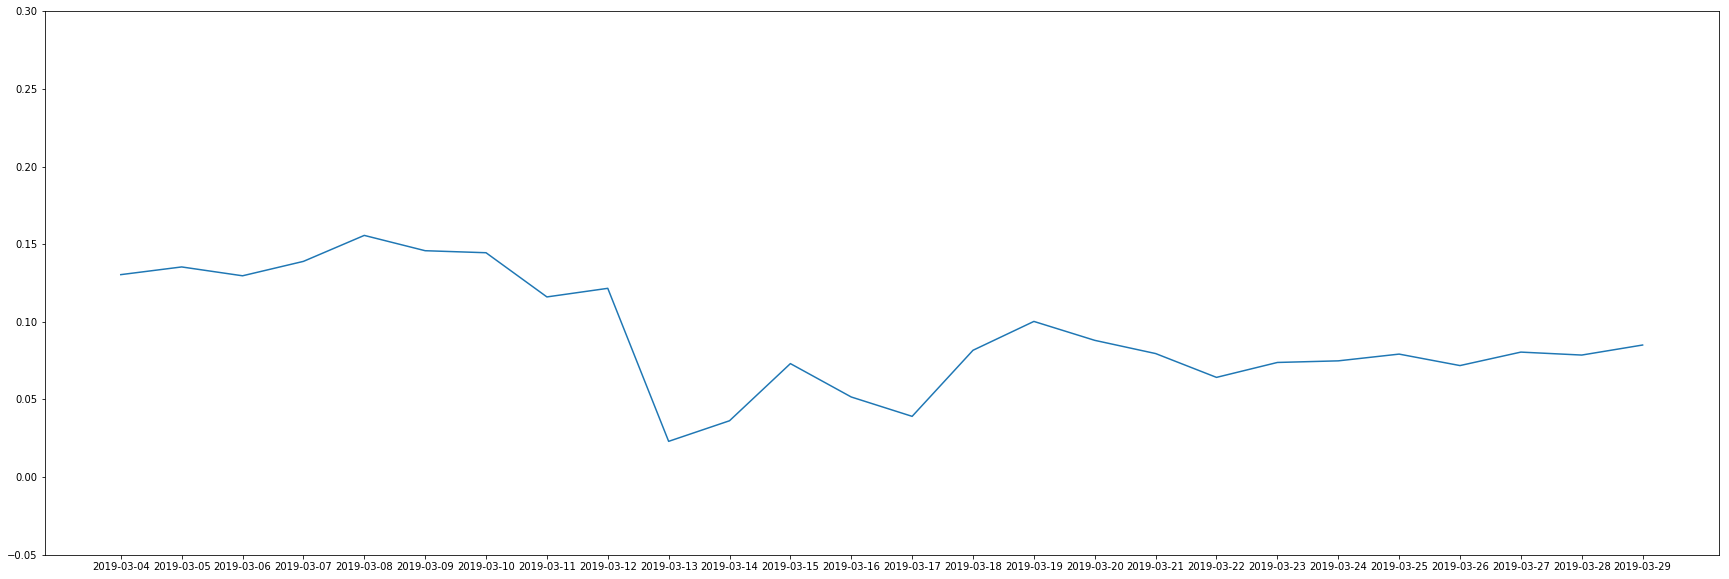

In [39]:
plt.figure(figsize=(30,10))
plt.ylim(-0.05,0.3)
plt.plot(avg_sent_by_day);

# 3. Getting Stock Data

## 3.1 Aggregate Stock Data (S&P500 Top 50)

In [40]:
# data for complete S&P500 index (gathered for analysis)
agg_sp500 = pd.read_csv('^GSPC.csv')

In [41]:
agg_sp500.set_index('Date', inplace=True)

In [42]:
agg_sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000


In [43]:
agg_sp50 = pd.read_excel('S&PTop50 Aggregate Data-.xls')

In [44]:
agg_sp50.rename(columns={'Effective date ':'date'}, inplace=True)

In [45]:
agg_sp50.set_index('date', inplace=True)

In [46]:
agg_sp50 = pd.DataFrame(agg_sp50['S&P 500 Top 50'])

In [47]:
agg_sp50.head()

,S&P 500 Top 50
date,
2018-12-31,1999.51
2019-01-02,2008.08
2019-01-03,1947.96
2019-01-04,2019.01
2019-01-07,2029.65


## 3.2 Causality Analysis

In [48]:
df_for_causality = merged_dataset.merge(agg_sp50, left_index=True, right_index=True)

In [49]:
df_for_causality

,neg,neutral,pos,abs_sentiment,rel_sentiment,S&P 500 Top 50
date,,,,,,
2019-03-04,7010,17014,16837,9827,0.412085,2208.68
2019-03-05,7742,18180,18440,10698,0.408601,2210.25
2019-03-06,8526,20028,20185,11659,0.406081,2199.74
2019-03-07,7961,19026,20148,12187,0.433562,2180.94
2019-03-08,6855,16973,19029,12174,0.470329,2177.70
2019-03-11,8678,20528,18759,10081,0.367424,2214.70
2019-03-12,10410,23724,22705,12295,0.371282,2221.30
2019-03-13,30718,49541,35060,4342,0.066010,2235.87
2019-03-14,22724,43382,28476,5752,0.112344,2234.24


In [50]:
df_for_causality['pct_change'] = df_for_causality['S&P 500 Top 50'].pct_change()
df_for_causality['log_ret'] = np.log(df_for_causality['S&P 500 Top 50'])\
- np.log(df_for_causality['S&P 500 Top 50'].shift(1))

In [51]:
df_for_causality.fillna(value=0, inplace=True)

In [52]:
df_for_causality

,neg,neutral,pos,abs_sentiment,rel_sentiment,S&P 500 Top 50,pct_change,log_ret
date,,,,,,,,
2019-03-04,7010,17014,16837,9827,0.412085,2208.68,0.000000,0.000000
2019-03-05,7742,18180,18440,10698,0.408601,2210.25,0.000711,0.000711
2019-03-06,8526,20028,20185,11659,0.406081,2199.74,-0.004755,-0.004766
2019-03-07,7961,19026,20148,12187,0.433562,2180.94,-0.008546,-0.008583
2019-03-08,6855,16973,19029,12174,0.470329,2177.70,-0.001486,-0.001487
2019-03-11,8678,20528,18759,10081,0.367424,2214.70,0.016990,0.016848
2019-03-12,10410,23724,22705,12295,0.371282,2221.30,0.002980,0.002976
2019-03-13,30718,49541,35060,4342,0.066010,2235.87,0.006559,0.006538
2019-03-14,22724,43382,28476,5752,0.112344,2234.24,-0.000729,-0.000729


#### Check if time series are stationary

We test if our time series are stationary. For this purpose we utilise the ADF test, applied to a single series at a time. We utilised the python implementation available via statsmodel.

In [62]:
# ADF (Augmented Dickey Fuller) Test
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [103]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [63]:
adf_test(df_for_causality['S&P 500 Top 50'])

Results of Dickey-Fuller Test:
Test Statistic                -1.485676e+01
p-value                        1.743628e-27
#Lags Used                     8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


In [104]:
kpss_test(df_for_causality['S&P 500 Top 50'])

Results of KPSS Test:
Test Statistic           0.319036
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/s_hamdani/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [64]:
adf_test(df_for_causality['rel_sentiment'])

Results of Dickey-Fuller Test:
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


/home/s_hamdani/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [65]:
adf_test(df_for_causality['abs_sentiment'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


/home/s_hamdani/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [66]:
adf_test(df_for_causality['pos'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.927501
p-value                         0.778781
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [67]:
adf_test(df_for_causality['neg'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


/home/s_hamdani/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [79]:
# we remove the variable that is causing collinearity
# we use only rel_sentiment
temp_df = df_for_causality[['S&P 500 Top 50', 'rel_sentiment']]

In [80]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(temp_df,-1,1).eig

array([0.21261305, 0.02694354])

#### Granger-Causality of Stock Price with different sentiment variables

In [68]:
from statsmodels.tsa.stattools import grangercausalitytests

In [69]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','rel_sentiment']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4289  , p=0.5218  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.5093  , p=0.4754  , df=1
likelihood ratio test: chi2=0.5026  , p=0.4783  , df=1
parameter F test:         F=0.4289  , p=0.5218  , df_denom=16, df_num=1


In [70]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','abs_sentiment']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3668  , p=0.5533  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.4355  , p=0.5093  , df=1
likelihood ratio test: chi2=0.4306  , p=0.5117  , df=1
parameter F test:         F=0.3668  , p=0.5533  , df_denom=16, df_num=1


In [71]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','rel_sentiment']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1087  , p=0.7460  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.1290  , p=0.7194  , df=1
likelihood ratio test: chi2=0.1286  , p=0.7199  , df=1
parameter F test:         F=0.1087  , p=0.7460  , df_denom=16, df_num=1


In [72]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','abs_sentiment']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0885  , p=0.7700  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.1050  , p=0.7459  , df=1
likelihood ratio test: chi2=0.1048  , p=0.7462  , df=1
parameter F test:         F=0.0885  , p=0.7700  , df_denom=16, df_num=1


In [73]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','pos']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0467  , p=0.8316  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0555  , p=0.8138  , df=1
likelihood ratio test: chi2=0.0554  , p=0.8139  , df=1
parameter F test:         F=0.0467  , p=0.8316  , df_denom=16, df_num=1


In [74]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','neg']].values,maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0223  , p=0.8832  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0265  , p=0.8708  , df=1
likelihood ratio test: chi2=0.0264  , p=0.8708  , df=1
parameter F test:         F=0.0223  , p=0.8832  , df_denom=16, df_num=1


#### Vector Autoregressive (VAR) model for Multivariate Timeseries

In [99]:
var_model = df_for_causality[['log_ret', 'rel_sentiment', 'pos', 'neg']]

In [100]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=var_model, freq='B')
model_fit = model.fit()

In [101]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Apr, 2019
Time:                     14:18:20
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    22.0045
Nobs:                     19.0000    HQIC:                   21.1786
Log likelihood:          -287.437    FPE:                1.40185e+09
AIC:                      21.0103    Det(Omega_mle):     5.50643e+08
--------------------------------------------------------------------
Results for equation log_ret
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.006399         0.020637           -0.310           0.757
L1.log_ret              -0.118499         0.268583           -0.441           0.659
L1.rel_sentiment         0.022304         0.06

## 3.3 Individual Stock Data (S&P500 Top 50)

In [70]:
len(df['ticker'].unique())

49

In [71]:
tickers = list(set(df['ticker'].unique()))

In [72]:
tickers.append('BRK-B')
tickers.remove('BRK')

In [73]:
len(tickers)

49

In [82]:
# import fix_yahoo_finance as yf

# complete_panel_data = yf.download(tickers, start="2019-03-01", end="2019-03-27")

In [77]:
import pandas_datareader

start_date = '2019-03-01'
end_date = '2019-03-28'

complete_panel_data = pandas_datareader.get_data_yahoo(tickers, start_date, end_date)

In [80]:
complete_panel_data.head()

Attributes        High                                                \
Symbols           AAPL       ABBV        ABT        ADBE        AMGN   
Date                                                                   
2019-03-01  175.149994  80.849998  78.739998  266.239990  192.059998   
2019-03-04  177.750000  80.730003  78.970001  267.000000  192.119995   
2019-03-05  176.000000  79.900002  78.910004  259.869995  190.669998   
2019-03-06  175.490005  79.129997  78.220001  259.489990  189.369995   
2019-03-07  174.440002  79.120003  77.949997  257.489990  183.160004   

Attributes                                                              \
Symbols            AMZN        AVGO          BA        BAC       BRK-B   
Date                                                                     
2019-03-01  1674.260010  278.160004  446.010010  29.650000  203.839996   
2019-03-04  1709.430054  276.579987  444.500000  29.540001  204.869995   
2019-03-05  1707.800049  280.440002  433.850006  29.190001  202.000000   
2019-03-06  1697.750000  276.929993  432.000000  29.160000  202.300003   
2019-03-07  1669.750000  270.329987  434.350006  28.719999  200.580002   

Attributes    ...      Adj Close                                    \
Symbols       ...             PM       PYPL          T         UNH   
Date          ...                                                    
2019-03-01    ...      86.415771  98.800003  30.820000  245.214050   
2019-03-04    ...      86.188644  96.570000  29.980000  235.122589   
2019-03-05    ...      85.892395  96.529999  29.950001  240.512009   
2019-03-06    ...      85.931892  96.459999  29.809999  238.160995   
2019-03-07    ...      85.882523  96.209999  29.920000  235.799988   

Attributes                                                                      
Symbols            UNP           V         VZ        WFC        WMT        XOM  
Date                                                                            
2019-03-01  167.440002  149.470001  56.959999  50.029999  97.405891  80.000000  
2019-03-04  167.369995  147.960007  56.240002  50.110001  97.326317  80.309998  
2019-03-05  166.779999  147.949997  56.080002  49.889999  97.813690  80.190002  
2019-03-06  165.910004  147.809998  55.680000  49.820000  97.734123  79.279999  
2019-03-07  164.940002  146.830002  56.299999  49.680000  96.928452  80.160004  

[5 rows x 294 columns]

In [38]:
complete_panel_data.loc[complete_panel_data.index]['Adj Close']

,AAPL,ABBV,ABT,ADBE,AMGN,AMZN,AVGO,BA,BAC,BRK-B,...,PM,PYPL,T,UNH,UNP,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,174.970001,80.099998,78.589996,264.010010,191.160004,1671.729980,270.335175,440.619995,29.309999,203.130005,...,86.415771,98.800003,30.820000,245.214050,167.440002,149.470001,56.959999,50.029999,97.405891,80.000000
2019-03-04,175.850006,79.459999,78.620003,258.160004,189.779999,1696.170044,272.456238,432.690002,29.030001,201.809998,...,86.188644,96.570000,29.980000,235.122589,167.369995,147.960007,56.240002,50.110001,97.326317,80.309998
2019-03-05,175.529999,78.910004,78.220001,257.380005,188.820007,1692.430054,274.557465,430.119995,29.080000,201.470001,...,85.892395,96.529999,29.950001,240.512009,166.779999,147.949997,56.080002,49.889999,97.813690,80.190002
2019-03-06,174.520004,78.089996,77.699997,256.399994,183.149994,1668.949951,268.947571,424.459991,28.840000,200.669998,...,85.931892,96.459999,29.809999,238.160995,165.910004,147.809998,55.680000,49.820000,97.734123,79.279999
2019-03-07,172.500000,78.239998,76.800003,255.460007,181.460007,1625.949951,263.159271,422.559998,28.549999,199.300003,...,85.882523,96.209999,29.920000,235.799988,164.940002,146.830002,56.299999,49.680000,96.928452,80.160004
2019-03-08,172.910004,77.580002,76.629997,254.740005,180.869995,1620.800049,261.850952,422.540009,28.650000,198.699997,...,86.356514,95.690002,29.959999,237.289993,164.300003,147.350006,56.529999,49.799999,97.067703,79.010002
2019-03-11,178.899994,78.080002,77.809998,260.959991,184.139999,1670.619995,266.677826,400.010010,28.940001,202.089996,...,88.124130,97.449997,30.219999,243.149994,165.600006,150.669998,57.580002,49.759998,97.952950,79.779999
2019-03-12,180.910004,78.739998,78.239998,263.510010,184.179993,1673.099976,267.242798,375.410004,28.940001,202.500000,...,87.689636,97.500000,30.629999,245.880005,164.830002,151.729996,57.430000,49.650002,97.843536,80.000000
2019-03-13,181.710007,78.930000,78.620003,264.380005,187.350006,1690.810059,268.808777,377.140015,29.290001,204.059998,...,88.380882,99.309998,30.280001,252.250000,166.830002,152.470001,57.660000,49.919998,98.500000,80.709999


In [79]:
#complete_panel_data.to_csv('panel_data')